SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data= pd.read_csv('new_data_evaluacion.csv')
data.head()

,Unnamed: 0,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1


In [3]:
data.describe()

,Unnamed: 0,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,24420.500000,38.643585,1.896641e+05,10.078089,0.541051,1.443287,6.152819,3.668052,0.668482,0.082613,0.046722,40.422382,0.914971,0.980959,0.760718
std,14099.615261,13.710510,1.056040e+05,2.570973,0.498317,1.602151,3.968837,0.845986,0.470764,0.275300,0.211045,12.391444,0.278928,0.500042,0.426649
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,1.000000,1.000000,7.000000,4.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,1.000000,3.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,1.000000,5.000000,13.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,3.000000,1.000000


In [4]:
print(data.isnull().sum())

Unnamed: 0         0
edad               0
fnlwgt             0
educacionNum       0
estadoCivil        0
relacion           0
ocupacion          0
raza               0
genero             0
gananciaCapital    0
perdidaCapital     0
horasSemana        0
pais               0
tipoEmpleo         0
salario            0
dtype: int64


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.head()

,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1


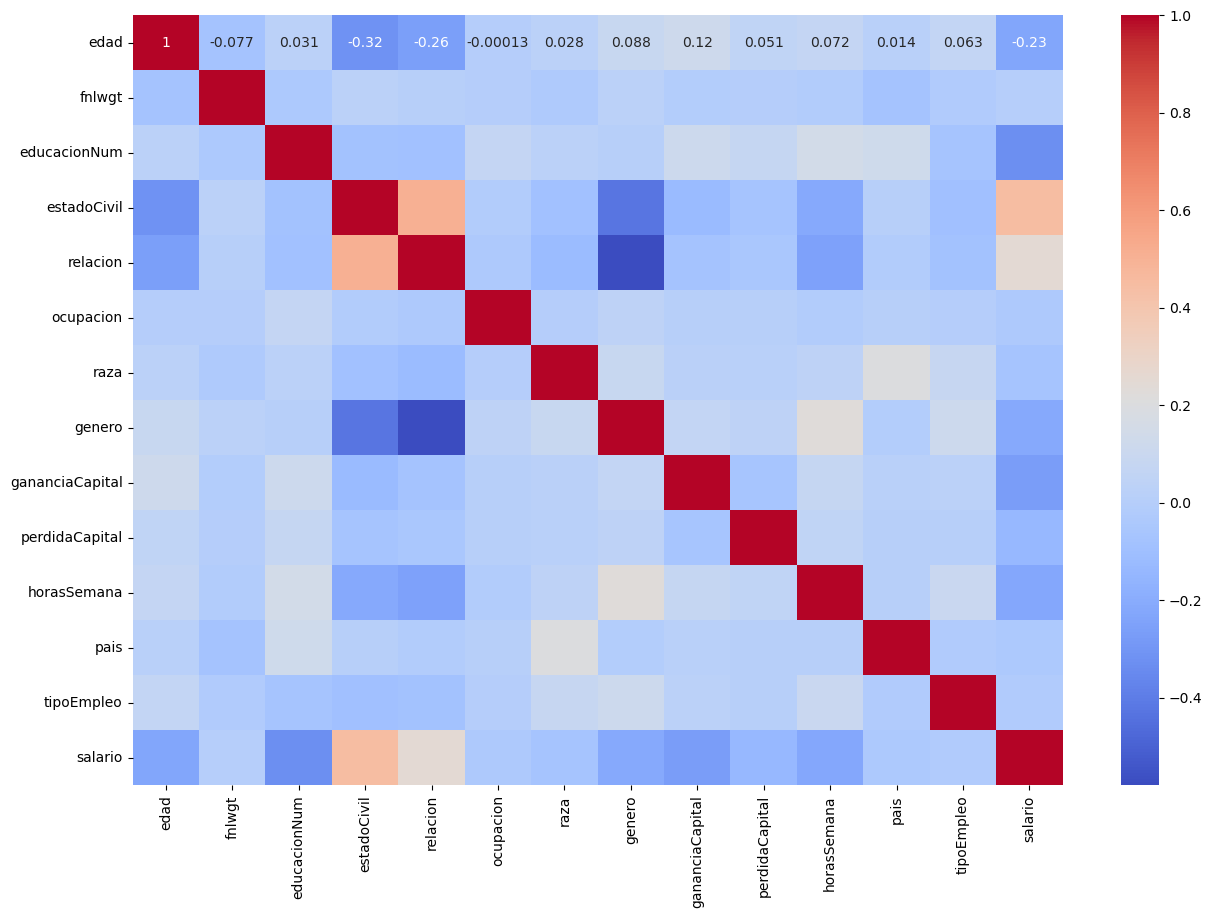

In [7]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop(['salario'], axis=1)
y = data['salario']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenando con kernel: linear
Resultados para kernel linear:
Accuracy: 0.8332764621579198
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      3544
           1       0.86      0.93      0.89     11109

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.83     14653

[[ 1924  1620]
 [  823 10286]]


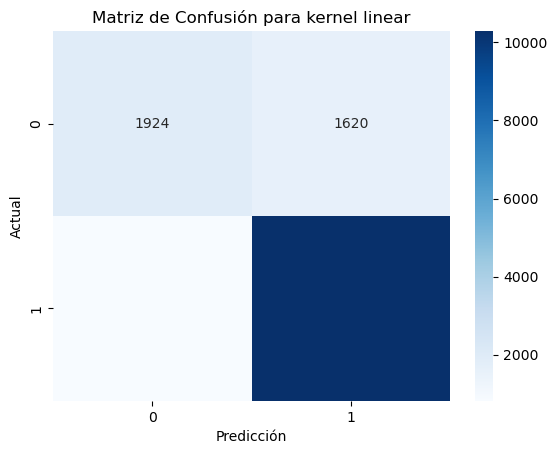

Entrenando con kernel: poly
Resultados para kernel poly:
Accuracy: 0.8372346959666962
              precision    recall  f1-score   support

           0       0.73      0.52      0.61      3544
           1       0.86      0.94      0.90     11109

    accuracy                           0.84     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

[[ 1845  1699]
 [  686 10423]]


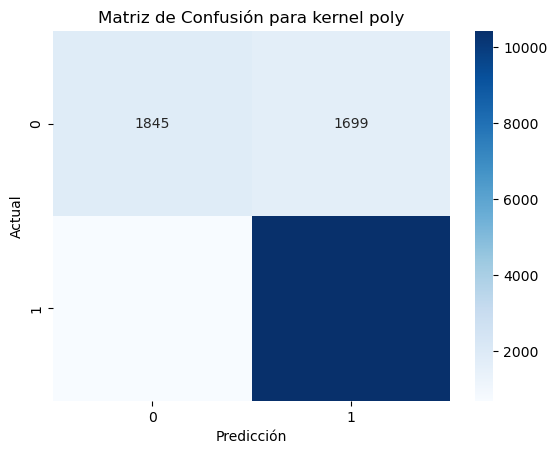

Entrenando con kernel: rbf
Resultados para kernel rbf:
Accuracy: 0.835733296935781
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      3544
           1       0.86      0.93      0.90     11109

    accuracy                           0.84     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653

[[ 1871  1673]
 [  734 10375]]


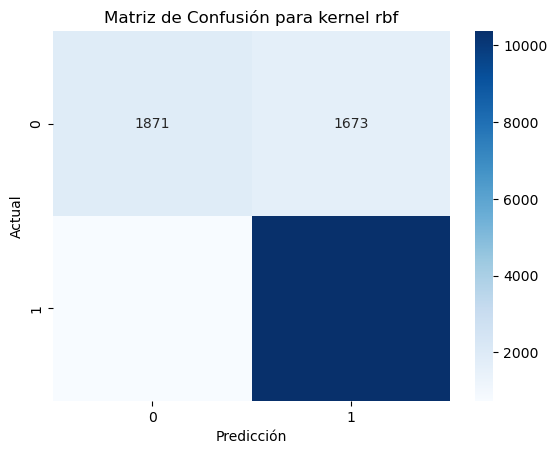

Entrenando con kernel: sigmoid
Resultados para kernel sigmoid:
Accuracy: 0.754248276803385
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      3544
           1       0.83      0.84      0.84     11109

    accuracy                           0.75     14653
   macro avg       0.66      0.66      0.66     14653
weighted avg       0.75      0.75      0.75     14653

[[1676 1868]
 [1733 9376]]


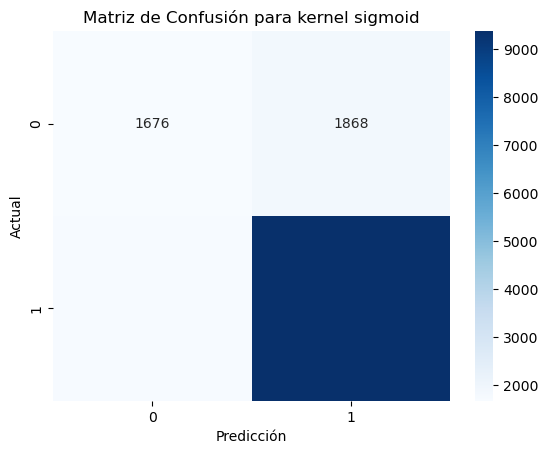

In [11]:
# Definir los kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"Entrenando con kernel: {kernel}")
    # Inicializar el modelo SVM con el kernel específico
    model = SVC(kernel=kernel)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    print(f"Resultados para kernel {kernel}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Matriz de Confusión para kernel {kernel}')
    plt.show()
  